In [1]:
import networkx as nx

### Create graph

In [2]:
G = nx.Graph()

### Adding node

In [3]:
G.add_node(1)

In [4]:
G.add_nodes_from([2,3])

### With node attributes

In [6]:
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "blue"})
])

### Import nodes from other graph

In [8]:
H = nx.path_graph(10)
G.add_nodes_from(H)

### Adding edges

In [16]:
G.add_edge(1,2)
e = (2,3)
G.add_edge(*e) #unpacking tuple

In [17]:
G.add_edges_from([(1,2), (1,3)])

In [18]:
G.add_edges_from(H.edges)

In [19]:
#remove all nodes and edges
G.clear()

In [40]:
G.add_edges_from([(1,2), (1,3)])
G.add_node(1)
G.add_edge(1,2)
G.add_node("spam") # adds node "spam"
G.add_nodes_from("spam") #adds 4 nodes s, p, a, m
G.add_edge(3, 'm')

In [34]:
G.number_of_nodes()

8

In [35]:
G.number_of_edges()

3

###  Examining graphs

In [50]:
list(G.nodes)

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [51]:
list(G.edges)

[(1, 2), (1, 3), (3, 'm')]

In [57]:
list(G.adj[1])

[2, 3]

In [58]:
G.edges([2,'m'])

EdgeDataView([(2, 1), ('m', 3)])

In [59]:
G.degree([2,3])

DegreeView({2: 1, 3: 2})

### Subscript notation

In [65]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
G.add_edge(1,3)
G[1][3]['color'] = 'blue'
G[1][2]['color'] = 'red'

In [66]:
G.edges[1,2]

{'color': 'red'}

###  Access edge data

In [67]:
FG = nx.Graph()

FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])

for n, nbrs in FG.adj.items():

   for nbr, eattr in nbrs.items():

       wt = eattr['weight']

       if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [70]:
for u, v, wt in FG.edges.data('weight'):
    if wt < 0.5:
        print(f'({u}, {v}, {wt:.3})')

(1, 2, 0.125)
(3, 4, 0.375)


### Node and edge attributes

In [71]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 2: {}, 3: {'time': '2pm'}})

In [72]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2
G.edges.data()

EdgeDataView([(1, 2, {'color': 'blue', 'weight': 4.7}), (1, 3, {'color': 'blue'}), (2, 3, {'weight': 8}), (3, 4, {'color': 'red', 'weight': 4.2}), (4, 5, {'color': 'red'})])

### Directed graphs

In [74]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')
DG.degree(1, weight='weight')
print(list(DG.successors(1)))
print(list(DG.neighbors(1)))

[2]
[2]


### Convert to undirected graph

In [75]:
H = nx.Graph(G)

### Multi graphs

In [76]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])

print(dict(MG.degree(weight='weight')))

GG = nx.Graph()
for n, nbrs in MG.adjacency():
   for nbr, edict in nbrs.items():
       minvalue = min([d['weight'] for d in edict.values()])
       GG.add_edge(n, nbr, weight = minvalue)

nx.shortest_path(GG, 1, 3)

{1: 1.25, 2: 1.75, 3: 0.5}


[1, 2, 3]

### Drawing graphs

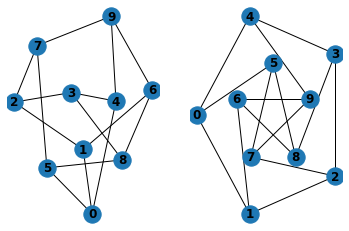

In [77]:
import matplotlib.pyplot as plt
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

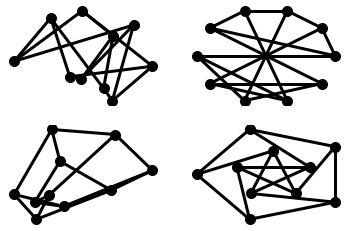

In [78]:
options = {

    'node_color': 'black',

    'node_size': 100,

    'width': 3,

}

plt.subplot(221)
nx.draw_random(G, **options)
plt.subplot(222)
nx.draw_circular(G, **options)
plt.subplot(223)
nx.draw_spectral(G, **options)
plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)